In [1]:
import numpy as np 
import copy 
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
import pandas as pd
dir_path = 'training_data/'
data = pd.read_csv(dir_path+'pokemon.csv')
df = pd.DataFrame(data)
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


<AxesSubplot:xlabel='attack', ylabel='defense'>

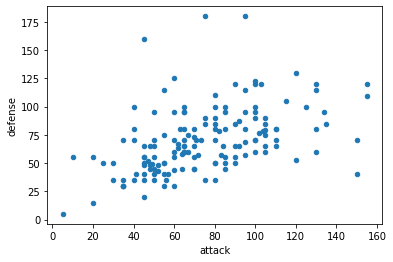

In [3]:
g1 = data.loc[data.generation==1,:]
attack = np.array(g1['attack'])
defense = np.array(g1['defense'])

g1.plot.scatter('attack', 'defense')

# Gradient decent method

In [ ]:




#j(theta1,theta2) =(1/2m)*sum(h(theta1,theta2)^i - y^i)^2

#h(t1,t2) = t1 + t2*x

#grad_1 = dj/dt1
#grad_2 = dj/dt2

def  der_j(theta0,theta1,x_array,y_array,indicator):
    def dj_dtheta():
        my_sum = 0
        if indicator == 'theta0':
            for i,j in zip(x_array,y_array):
                my_sum = my_sum + (h(i) - j)
               
          
            return (1/len(y_array))* my_sum 
        elif indicator == 'theta1':
            for i,j in zip(x_array,y_array):
                my_sum = my_sum + (h(i) - j)*i
              
            return (1/len(y_array))* my_sum
    grad_f = dj_dtheta() 

    return grad_f

def feature_scaling(y_data, x_data):
    y_mean = stat.mean(y_data)
    y_std = stat.stdev(y_data)
    
    y_scaled =  (y_data - y_mean)/y_std
    
    x_mean = stat.mean(x_data)
    x_std = stat.stdev(x_data)
    x_scaled =  (x_data - x_mean)/x_std
#     print('scaled date', y_scaled)
#     print('unscaled', y_data)
    return x_scaled, y_scaled
    
h = lambda x: theta0 + theta1*x
        
alpha = 10**-4
x_list = []
y_list =[]
theta0 = 1
theta1 = 1
old_theta0 = 0
old_theta1 = 0


g1 = data.loc[data.generation==1,:]
x_data= np.array(g1['attack'])
y_data = np.array(g1['defense'])
x_scaled, y_scaled = feature_scaling(y_data, x_data)



while(abs(theta0- old_theta0) > 10**-6 or abs(theta1 -old_theta1)> 10**-6):
    
  
    old_theta0 = copy.deepcopy(theta0)
    old_theta1 = copy.deepcopy(theta1)
    temp_theta0 = theta0 - alpha*der_j(theta0,theta1,x_scaled, y_scaled,'theta0')
    temp_theta1 = theta1 - alpha*der_j(theta0,theta1,x_scaled, y_scaled,'theta1')
    theta0 = temp_theta0
    theta1 = temp_theta1

print(theta0, theta1)
plt.scatter(x_scaled, y_scaled)
plt.plot(x_scaled, h(x_scaled)) 








# Normal Equation

(2, 151)


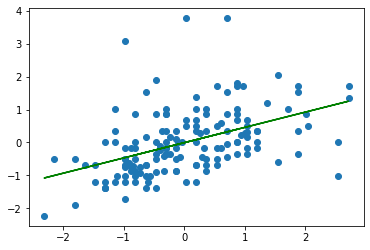

In [51]:

g1 = data.loc[data.generation==1,:]
x_data= np.array(g1['attack'])
y_data = np.array(g1['defense'])
x_scaled, y_scaled = feature_scaling(y_data, x_data)
y_col =  np.reshape(y_scaled ,(len(y_scaled ),1))
x_col =  np.reshape(x_scaled ,(len(x_scaled ),1))

n_rows = len(x_scaled)
x_0=np.ones((n_rows,1))
x_matrix = np.hstack((x_0,x_col))


#theta = (X_T*X)^-1 (X_T*Y)
print(x_matrix.transpose().shape)
theta_col = np.linalg.inv(x_matrix.T@x_matrix)@(x_matrix.T@y_col) 
h_prime = lambda x: theta_col[0] + theta_col[1]*x

#graph
plt.scatter(x_scaled, y_scaled)
plt.plot(x_scaled, h_prime(x_scaled), 'g') 